In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df_final_demo = pd.read_csv("C:/Users/osanc/Desktop/IronHack/Sem_5/Project/df_final_demo.txt")
df_final_experiment_clients = pd.read_csv("C:/Users/osanc/Desktop/IronHack/Sem_5/Project/df_final_experiment_clients.txt")
df_final_web_data_pt_1 = pd.read_csv("C:/Users/osanc/Desktop/IronHack/Sem_5/Project/df_final_web_data_pt_1.txt")
df_final_web_data_pt_2 = pd.read_csv("C:/Users/osanc/Desktop/IronHack/Sem_5/Project/df_final_web_data_pt_2.txt")

## clean df_final_demo

In [5]:
df_final_demo.head(3)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0


In [23]:
df_final_demo.shape

(70609, 9)

In [22]:
df_final_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [36]:
df_final_demo["clnt_tenure_yr"].value_counts()

clnt_tenure_yr
6.0     7092
5.0     6955
7.0     4955
4.0     4687
15.0    4564
8.0     4045
14.0    3646
12.0    3631
13.0    3607
9.0     3357
11.0    2920
10.0    2775
16.0    2714
21.0    2257
20.0    1580
22.0    1492
17.0    1373
23.0    1279
18.0    1206
19.0    1153
24.0     846
26.0     660
27.0     632
28.0     507
25.0     484
3.0      449
29.0     309
30.0     303
33.0     206
32.0     191
34.0     175
31.0     166
35.0     102
2.0       81
36.0      36
37.0      35
38.0      33
48.0      16
39.0       9
40.0       9
55.0       9
50.0       8
47.0       6
43.0       6
42.0       6
46.0       5
51.0       5
49.0       4
44.0       3
52.0       2
54.0       1
41.0       1
45.0       1
62.0       1
Name: count, dtype: int64

In [37]:
df_final_demo["clnt_tenure_mnth"].value_counts()

clnt_tenure_mnth
58.0     1711
70.0     1404
59.0     1282
71.0     1020
82.0      974
         ... 
655.0       1
564.0       1
526.0       1
532.0       1
480.0       1
Name: count, Length: 482, dtype: int64

In [38]:
df_final_demo["num_accts"].value_counts()

num_accts
2.0    55497
3.0    12529
4.0     2241
5.0      284
6.0       33
7.0        8
1.0        2
8.0        1
Name: count, dtype: int64

In [28]:
df_final_demo.isnull().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [21]:
df_final_demo.nunique().sort_values(ascending=False)

client_id           70609
bal                 70328
clnt_tenure_mnth      482
clnt_age              165
clnt_tenure_yr         54
logons_6_mnth           9
num_accts               8
calls_6_mnth            8
gendr                   4
dtype: int64

In [17]:
df_final_demo[df_final_demo.duplicated()]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth


In [13]:
df_final_demo["gendr"].value_counts()

gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

In [20]:
df_final_demo["logons_6_mnth"].value_counts()

logons_6_mnth
9.0    12350
3.0    10243
4.0    10220
7.0     9893
5.0     9254
6.0     7878
8.0     4810
2.0     3009
1.0     2938
Name: count, dtype: int64

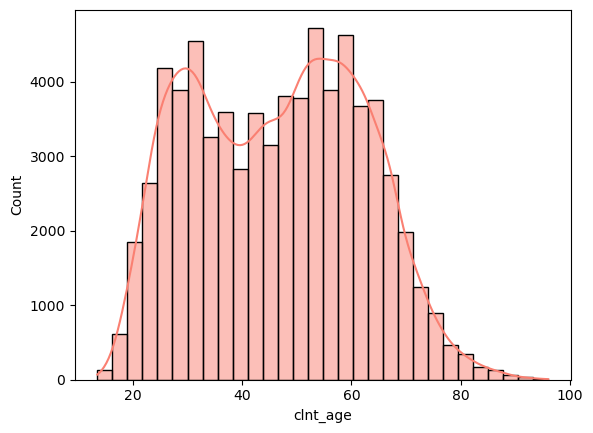

In [30]:
sns.histplot(df_final_demo['clnt_age'], kde=True, bins=30, color="salmon")
plt.show()

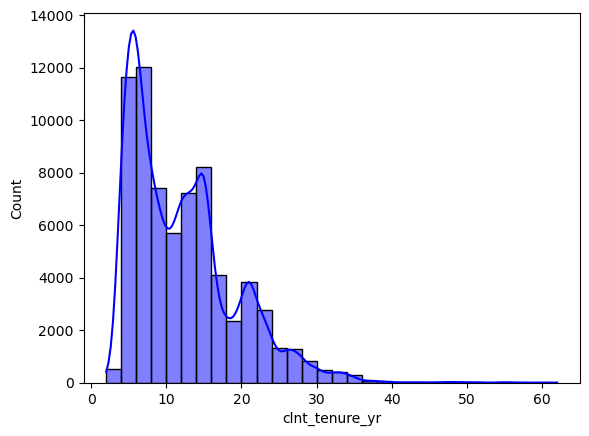

In [33]:
sns.histplot(df_final_demo['clnt_tenure_yr'], kde=True, bins=30, color="blue")
plt.show()

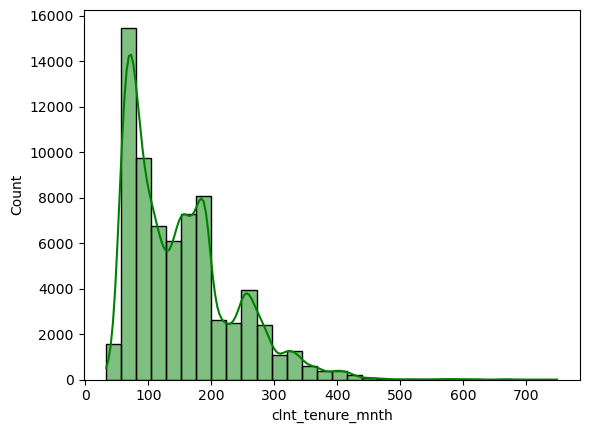

In [34]:
sns.histplot(df_final_demo['clnt_tenure_mnth'], kde=True, bins=30, color="green")
plt.show()

C:\Users\osanc\AppData\Local\Temp\ipykernel_40708\711213842.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_demo, x='gendr', palette="Set3", legend=False)


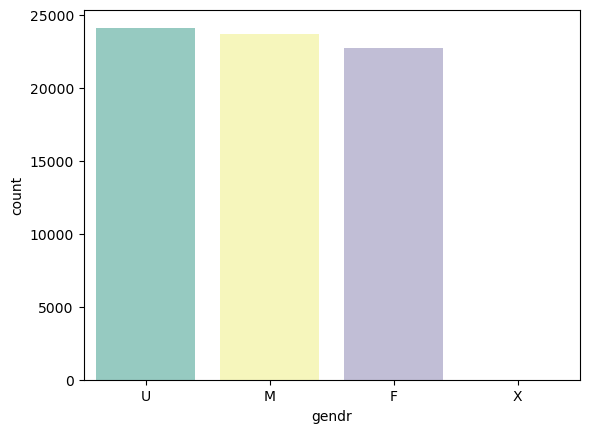

In [31]:
sns.countplot(data=df_final_demo, x='gendr', palette="Set3", legend=False)
plt.show()

## clean df_final_experiment_clients

In [6]:
df_final_experiment_clients.head(3)

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control


In [27]:
df_final_experiment_clients.shape

(70609, 2)

In [24]:
df_final_experiment_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [35]:
df_final_experiment_clients.isnull().sum()

client_id        0
Variation    20109
dtype: int64

In [26]:
df_final_experiment_clients["Variation"].value_counts()

Variation
Test       26968
Control    23532
Name: count, dtype: int64

In [25]:
df_final_experiment_clients["Variation"].value_counts(normalize=True)

Variation
Test       0.53402
Control    0.46598
Name: proportion, dtype: float64

## df_final_web

In [7]:
df_final_web_data_pt_1.head(3)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22


In [11]:
df_final_web_data_pt_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343141 entries, 0 to 343140
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     343141 non-null  int64 
 1   visitor_id    343141 non-null  object
 2   visit_id      343141 non-null  object
 3   process_step  343141 non-null  object
 4   date_time     343141 non-null  object
dtypes: int64(1), object(4)
memory usage: 13.1+ MB


In [8]:
df_final_web_data_pt_2.head(3)

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48


In [12]:
df_final_web_data_pt_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412264 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     412264 non-null  int64 
 1   visitor_id    412264 non-null  object
 2   visit_id      412264 non-null  object
 3   process_step  412264 non-null  object
 4   date_time     412264 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.7+ MB


In [39]:
merged_df = pd.concat([df_final_web_data_pt_1,df_final_web_data_pt_2 ], ignore_index=True)
merged_df.head()


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [40]:
merged_df.shape

(755405, 5)

In [46]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 28.8+ MB


In [48]:
merged_df.isnull().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [43]:
merged_df["process_step"].value_counts()

process_step
start      243945
step_1     163193
step_2     133062
step_3     112242
confirm    102963
Name: count, dtype: int64

In [44]:
merged_df["visitor_id"].value_counts()

visitor_id
722943003_3441581446     104
857376424_12378092455     90
272742682_16716805486     81
78799102_14329268381      80
780189529_68744403580     80
                        ... 
126345313_81637097552      1
344922862_88034013382      1
920532103_65264751870      1
451773986_45029239446      1
947159805_81558194550      1
Name: count, Length: 130236, dtype: int64

In [45]:
merged_df["visit_id"].value_counts()

visit_id
875138661_34710212496_881092    104
518285126_8572733997_709761      88
602953935_48759866176_238903     80
961878360_85895454962_607105     80
308874104_3998249411_902973      72
                               ... 
102624258_43364229051_125535      1
780988840_22026485488_430889      1
684165134_19767897066_267107      1
748112830_53678213677_437020      1
86152093_47511127657_716022       1
Name: count, Length: 158095, dtype: int64